## Content list

#### 1. Import libraries
#### 2. Import data
#### 3. Data cleaning
#### 4. Standardization
#### 5. The elbow technique
#### 6. K-means clustering
#### 7. Visualizations
#### 8. Discussion on clusters
#### 9. Descriptive statistics for cluster

## 1. Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
from sklearn.preprocessing import StandardScaler   # For data standardization
from sklearn.metrics import pairwise_distances   # To calculate total within-cluster distance
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
import warnings

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# Disable deprecation warnings that could indicate, for instance, a suspended library or feature. 
# These are more relevant to developers and very seldom to analysts.
warnings.filterwarnings('ignore')

## 2. Import data

In [4]:
# Turn project folder path into a string
path = r'C:\Users\Admin\Desktop\Data Analysis\Advanced Analytics & Dashboard Design\Competitive_LoL_Analysis'

In [5]:
path

'C:\\Users\\Admin\\Desktop\\Data Analysis\\Advanced Analytics & Dashboard Design\\Competitive_LoL_Analysis'

In [6]:
# Import league competitive data
df_lol = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'competitve_data_cleaned_country.csv'), index_col = False)

In [7]:
# Check output
df_lol.head()

,gameid,league,year,date,game,patch,participantid,side,position,champion,...,teamkills,teamdeaths,damagetochampions,damageshare,totalgold,golddiffat15,xpdiffat15,kda,region,country
0,LOLTMNT06_13630,LEC,2024,2024-01-13,1,14.01,1,Blue,top,Renekton,...,10,14,10063,0.286116,12202,1690.0,-346.0,2.0,Europe,United Kingdom
1,LOLTMNT06_13630,LEC,2024,2024-01-13,1,14.01,2,Blue,jng,Nocturne,...,10,14,4562,0.129709,9892,-378.0,74.0,2.0,Europe,United Kingdom
2,LOLTMNT06_13630,LEC,2024,2024-01-13,1,14.01,3,Blue,mid,Akali,...,10,14,11408,0.324358,10279,279.0,-330.0,1.0,Europe,United Kingdom
3,LOLTMNT06_13630,LEC,2024,2024-01-13,1,14.01,4,Blue,bot,Kalista,...,10,14,6014,0.170993,11703,213.0,1319.0,2.0,Europe,United Kingdom
4,LOLTMNT06_13630,LEC,2024,2024-01-13,1,14.01,5,Blue,sup,Pyke,...,10,14,3124,0.088823,7580,-75.0,-1313.0,1.0,Europe,United Kingdom


In [8]:
# Print number of rows and columns in df_lol
df_lol.shape

(10512, 35)

## 3. Data cleaning

In [12]:
# Remove data from position which have team, as we are only looking at top lane position player data
df_lol_top = df_lol.loc[df_lol['position'] == 'top']

In [13]:
# Checking if team data have been dropped.
df_lol_top['position'].value_counts()

position
top    1752
Name: count, dtype: int64

In [14]:
# Drop non-numeric columns
df_lol_top_numeric = df_lol_top.select_dtypes(include=[np.number])

In [16]:
# Verify non-numeric columns are dropped
print(df_lol_top_numeric.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1752 entries, 0 to 10505
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               1752 non-null   int64  
 1   game               1752 non-null   int64  
 2   patch              1752 non-null   float64
 3   participantid      1752 non-null   int64  
 4   gamelength         1752 non-null   int64  
 5   result             1752 non-null   int64  
 6   kills              1752 non-null   int64  
 7   deaths             1752 non-null   int64  
 8   assists            1752 non-null   int64  
 9   teamkills          1752 non-null   int64  
 10  teamdeaths         1752 non-null   int64  
 11  damagetochampions  1752 non-null   int64  
 12  damageshare        1752 non-null   float64
 13  totalgold          1752 non-null   int64  
 14  golddiffat15       1002 non-null   float64
 15  xpdiffat15         1002 non-null   float64
 16  kda                1752 non-

In [20]:
# Dropping other irrelevant columns 
# (golddiffat15 & xpdiffat15 is dropped as this analysis included China region data which do not contain those)
df_lol_top_clean = df_lol_top_numeric.drop(columns=['year', 'game', 'participantid', 'golddiffat15', 'xpdiffat15'])

In [21]:
# Verify non-numeric columns are dropped
print(df_lol_top_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1752 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patch              1752 non-null   float64
 1   gamelength         1752 non-null   int64  
 2   result             1752 non-null   int64  
 3   kills              1752 non-null   int64  
 4   deaths             1752 non-null   int64  
 5   assists            1752 non-null   int64  
 6   teamkills          1752 non-null   int64  
 7   teamdeaths         1752 non-null   int64  
 8   damagetochampions  1752 non-null   int64  
 9   damageshare        1752 non-null   float64
 10  totalgold          1752 non-null   int64  
 11  kda                1752 non-null   float64
dtypes: float64(3), int64(9)
memory usage: 177.9 KB
None


In [22]:
# Checking the there is any missing data
df_lol_top_clean.isnull().sum()

patch                0
gamelength           0
result               0
kills                0
deaths               0
assists              0
teamkills            0
teamdeaths           0
damagetochampions    0
damageshare          0
totalgold            0
kda                  0
dtype: int64

## 4. Standardization

In [23]:
# Define a standard scaler object
scaler = StandardScaler()

In [24]:
# Fit and transform data
df_lol_top_clean_scaled = scaler.fit_transform(df_lol_top_clean)

In [25]:
# Check output of scaled data
df_lol_top_clean_scaled

array([[-1.29340821, -0.61483086, -1.        , ...,  0.98657132,
        -0.18497657, -0.54091679],
       [-1.29340821, -0.61483086,  1.        , ...,  0.41044392,
         0.0059846 , -0.54091679],
       [-1.29340821,  0.36204988, -1.        , ...,  1.38661172,
        -0.47302455, -0.86231175],
       ...,
       [ 1.46200422,  0.72505994, -1.        , ...,  0.13403383,
        -0.069686  , -0.48065524],
       [ 1.46200422,  0.00789372,  1.        , ..., -0.58960297,
        -0.32560966,  1.62849918],
       [ 1.46200422,  0.00789372, -1.        , ...,  0.38865135,
        -1.14442262, -0.86231175]])

## 5. The elbow technique

In [26]:
# Defines the range of potential clusters in the data.
num_cl = range(1, 10) 

In [27]:
# Defines k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [28]:
# Creates a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df_lol_top_clean_scaled).score(df_lol_top_clean_scaled) for i in range(len(kmeans))] 

In [29]:
# Check score output
score

[-21024.0,
 -14856.976068573462,
 -12742.183063514149,
 -11710.98573213664,
 -11016.114302834685,
 -10428.093937900907,
 -9892.686916533521,
 -9483.631856988903,
 -9094.142629994716]

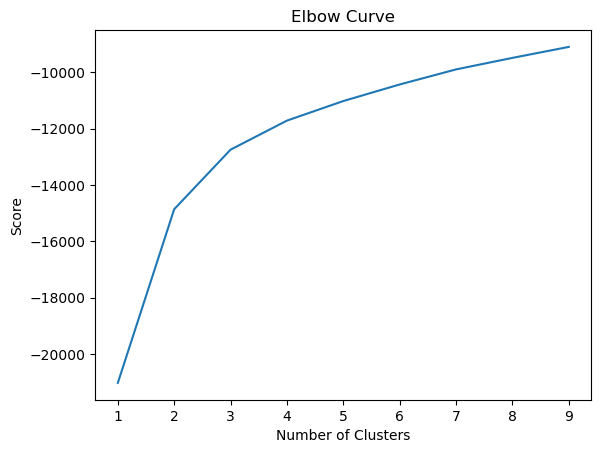

In [30]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  For this data, there's a visible jump from 1 to 4 on the x-axis, but after that, the curve starts to flatten out. This means that the optimal count for my clusters is 4.

## 6. K-means clustering

In [31]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 4) 

In [32]:
# Fit the k-means object to the data.
kmeans.fit(df_lol_top_clean)

KMeans(n_clusters=4)

In [33]:
# Create columns for cluster label in the dataset
df_lol_top_clean['clusters'] = kmeans.fit_predict(df_lol_top_clean)

In [34]:
# Check output of the dataset
df_lol_top_clean.head(20)

,patch,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,damagetochampions,damageshare,totalgold,kda,clusters
0,14.01,1749,0,3,3,3,10,14,10063,0.286116,12202,2.000000,3
5,14.01,1749,1,4,3,2,14,10,16517,0.248840,12737,2.000000,0
12,14.01,2080,0,0,3,2,4,16,18324,0.311999,11395,0.666667,0
17,14.01,2080,1,6,1,6,16,4,21777,0.318923,16692,12.000000,2
24,14.01,2370,0,0,4,4,9,20,18820,0.175212,12705,1.000000,0
29,14.01,2370,1,7,0,8,20,9,15944,0.169814,17541,15.000000,0
36,14.01,1964,0,6,3,9,18,24,35652,0.367425,15274,5.000000,1
41,14.01,1964,1,4,2,6,24,18,20459,0.235697,13363,5.000000,2
48,14.01,1657,1,3,1,3,17,1,14291,0.249913,13325,6.000000,0
53,14.01,1657,0,0,2,1,1,17,8596,0.303445,9279,0.500000,3


In [35]:
# Check value count of each cluster
df_lol_top_clean['clusters'].value_counts()

clusters
0    721
3    546
2    373
1    112
Name: count, dtype: int64

## 7. Visualizations

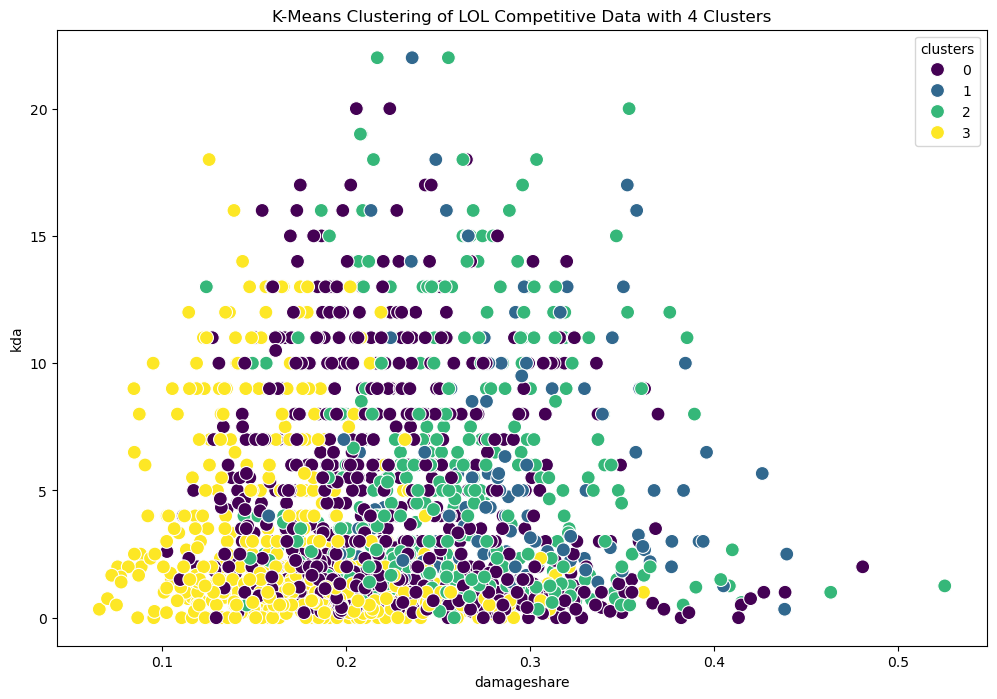

In [37]:
# Plotting the clusters of damageshare and kda
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_lol_top_clean, x='damageshare', y='kda', hue='clusters', palette='viridis', s=100)
plt.title('K-Means Clustering of LOL Competitive Data with 4 Clusters')
plt.xlabel('damageshare')
plt.ylabel('kda')
plt.legend(title='clusters')

# Export the scatterplot of clusters
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'kmeans_clustering_top_1.png'),  bbox_inches = 'tight');

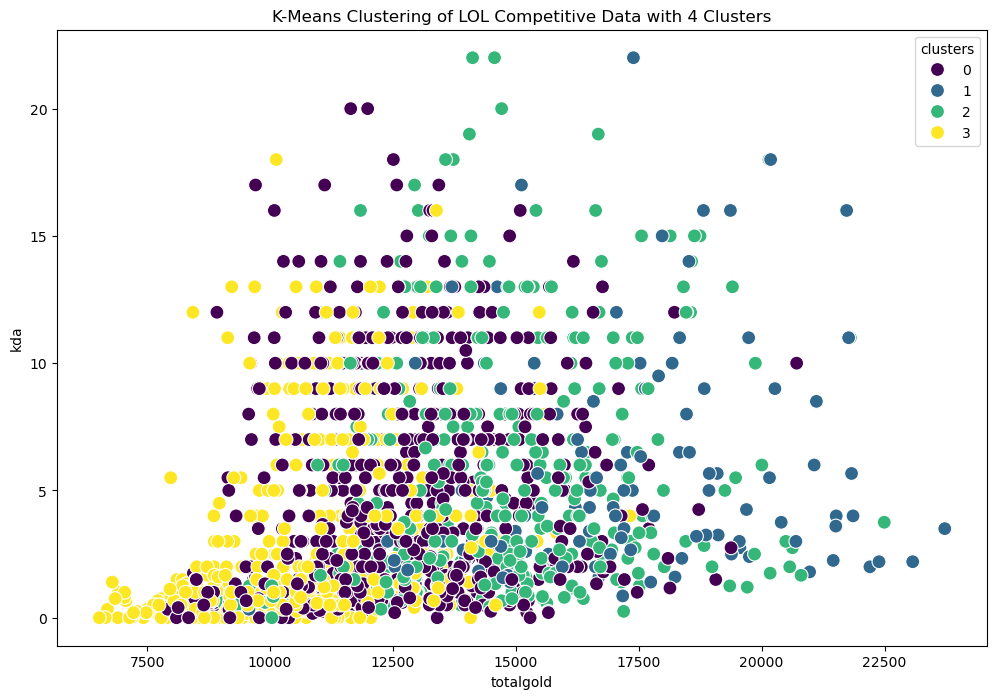

In [38]:
# Plotting the clusters of totalgold and kda
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_lol_top_clean, x='totalgold', y='kda', hue='clusters', palette='viridis', s=100)
plt.title('K-Means Clustering of LOL Competitive Data with 4 Clusters')
plt.xlabel('totalgold')
plt.ylabel('kda')
plt.legend(title='clusters')

# Export the scatterplot of clusters
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'kmeans_clustering_top_2.png'),  bbox_inches = 'tight');

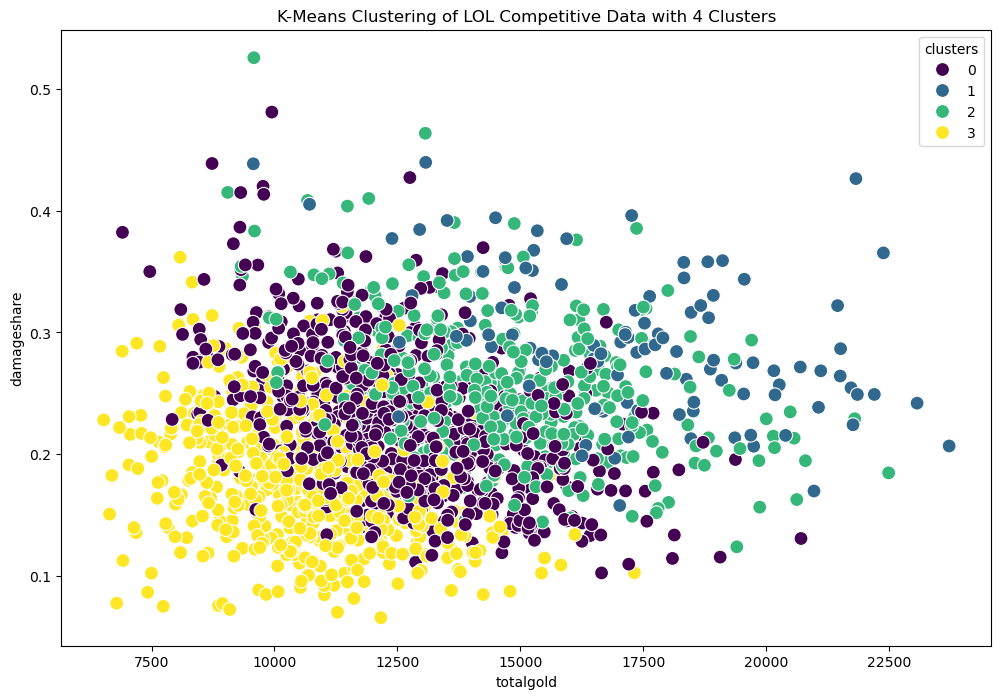

In [39]:
# Plotting the clusters of totalgold and damageshare
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_lol_top_clean, x='totalgold', y='damageshare', hue='clusters', palette='viridis', s=100)
plt.title('K-Means Clustering of LOL Competitive Data with 4 Clusters')
plt.xlabel('totalgold')
plt.ylabel('damageshare')
plt.legend(title='clusters')

# Export the scatterplot of clusters
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'kmeans_clustering_top_3.png'),  bbox_inches = 'tight');

## 8. Discussion on clusters

### The cluster on makes sense as they group the data points based on the performance of the players statistics such as percentage damage contribution in game and total gold earn in the game. Cluster 1 (Blue) is the highest performing players data points as they have high total gold and high damage share in game. Cluster 3 (Yellow) is the lowest performing players data points based on their damage contribution and gold.

### The cluster can be view in terms of the player performance in the game:
#### Cluster 1 (Blue): Highest performance players
#### Cluster 2 (Green): High performance players
#### Cluster 0 (Purple): Moderate performance players
#### Cluster 3 (Yellow): Low performance players

## 9. Descriptive statistics for clusters

In [42]:
df_lol_top_clean.loc[df_lol_top_clean['clusters'] == 0, 'cluster'] = 'purple'
df_lol_top_clean.loc[df_lol_top_clean['clusters'] == 1, 'cluster'] = 'blue'
df_lol_top_clean.loc[df_lol_top_clean['clusters'] == 2, 'cluster'] = 'green'
df_lol_top_clean.loc[df_lol_top_clean['clusters'] == 3, 'cluster'] = 'yellow'

In [45]:
# Basic descriptive statistics for each cluster
df_lol_top_clean.groupby('cluster').agg({'result':['mean', 'median'], 
                                    'kills':['mean', 'median'], 
                                    'deaths':['mean', 'median'],
                                    'assists':['mean', 'median'], 
                                    'damagetochampions':['mean', 'median'],
                                    'damageshare':['mean', 'median'],
                                    'totalgold':['mean', 'median'],
                                    'kda':['mean', 'median']
                                   })

result            kills           deaths          assists         \
             mean median      mean median      mean median      mean median   
cluster                                                                       
blue     0.633929    1.0  5.044643    5.0  3.169643    3.0  7.830357    7.5   
green    0.638070    1.0  3.630027    3.0  2.646113    2.0  5.908847    6.0   
purple   0.546463    1.0  2.312067    2.0  2.424411    2.0  4.894591    4.0   
yellow   0.316850    0.0  1.287546    1.0  2.661172    3.0  3.131868    2.0   

        damagetochampions          damageshare               totalgold  \
                     mean   median        mean    median          mean   
cluster                                                                  
blue         33746.133929  32105.0    0.291511  0.286562  17223.758929   
green        23051.847185  22729.0    0.257347  0.252537  14671.924933   
purple       16071.805825  16143.0    0.226665  0.222510  12603.983356   
yellow        9873.133700  10201.0    0.178345  0.175162  10616.644689   

                       kda            
          median      mean    median  
cluster                               
blue     17185.0  5.770206  4.291667  
green    14584.0  5.491118  4.000000  
purple   12484.0  4.555846  3.000000  
yellow   10554.5  2.667288  1.145833

### By looking through the descriptive statistics, it confirms again that the cluster is grouped by the performance of the players based on the different game statistics. I can see that the blue cluster is the highest performing players as the mean statistics for all the different game statistics is the highest compared to the other clusters (with exception of deaths stats).

In [52]:
# Creating a dataframe with the important statistic for the different cluster
df_cluster_stats = df_lol_top_clean.groupby('cluster').agg({'damageshare':['min','max','mean'],
                                    'totalgold':['min','max','mean'],
                                    'kda':['min','max','mean']
                                   })

In [48]:
df_cluster_stats.head()

damageshare                     totalgold                       \
                min       max      mean       min    max          mean   
cluster                                                                  
blue       0.158082  0.439506  0.291511      9570  23724  17223.758929   
green      0.124182  0.525338  0.257347      9049  22493  14671.924933   
purple     0.102759  0.480744  0.226665      6908  20711  12603.983356   
yellow     0.066028  0.361686  0.178345      6526  17322  10616.644689   

              kda                  
              min   max      mean  
cluster                            
blue     0.333333  22.0  5.770206  
green    0.000000  22.0  5.491118  
purple   0.000000  20.0  4.555846  
yellow   0.000000  18.0  2.667288

In [51]:
# Exporting df_clusters_stats as 'clusters_stats.csv'
df_cluster_stats.to_csv(os.path.join(path, '02 Data','Prepared Data', 'clusters_stats.csv'))